# Chapter 2 -- Multiple Qubits and Entanglement

### Chapter 2.2 -- Multiple Qubits and Entangled States

In [7]:
#Imports packages to be used for this textbook section

from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector


In [2]:
#Makes quantum circuit with 3 qubits, applies Hadamard gate to each, then draws the circuit

qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [4]:
#Runs simulation on above circuit to see the statevector output

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")


<IPython.core.display.Math object>

In [5]:
#Creates 2-qubit circuit, applies Hadamard gate on q0 and X-gate on q1, then draws circuit

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [7]:
#Runs unitary simulator to perform gate operations on the circuit

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()


In [8]:
#Views results of above simulation in a single unitary matrix

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")


<IPython.core.display.Math object>

In [9]:
#Creates circuit with 2 qubits, then places an X-gate on q1, then draws circuit

qc = QuantumCircuit(2)
qc.x(1)
qc.draw()


q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [11]:
#Simulates the unitary matrix and outputs the result of applying the singular gate to the circuit

# Simulate the unitary
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")


<IPython.core.display.Math object>

In [12]:
#Creates 2 qubit circuit and applies CNOT gate on q0-q1 and draws the circuit

qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()


q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [13]:
#Creates 2-qubit circuit and applies H-gate to q0, then draws circuit

qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()


┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [14]:
#Runs statevector simulator to output result of above circuit

# Let's see the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")


<IPython.core.display.Math object>

In [18]:
#Creates 2-qubit circuit, applies H-gate to q0, then CNot gate on q0-q1 and draws the circuit (Note here we entangle the qubits)

qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [22]:
#Obtains statevector of above circuit by running simulation

# Let's get the result:
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")


<IPython.core.display.Math object>

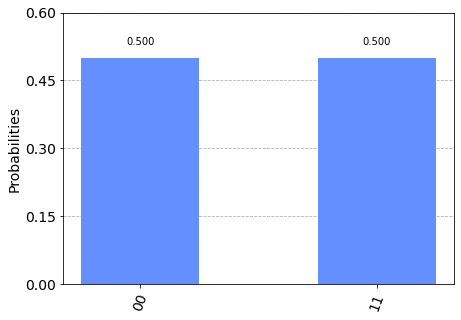

In [23]:
#Plot histogram from above simulation, showing entanglement between two states

plot_histogram(result.get_counts())


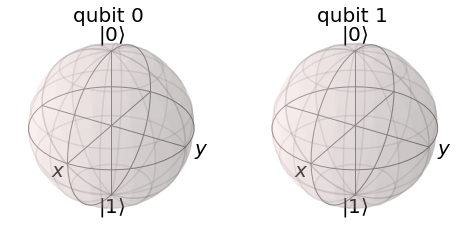

In [26]:
#Plots bloch sphere of each qubit (Notice we lose information of the state of each individual qubit)

plot_bloch_multivector(final_state)


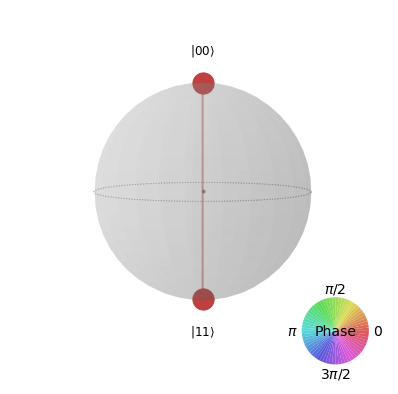

In [28]:
#Plots the possible states on a q-sphere

from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)


In [30]:
#Prints Qiskit Version
import qiskit
qiskit.__qiskit_version__


{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}

### Chapter 2.3 -- Phase Kickback

In [5]:
#Import Relevant packages

from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex


In [34]:
#Creates 2-qubit circuit, places H-gates on q0 and q1, a CNOT gate on q0-q1, then draws circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()


┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Math object>

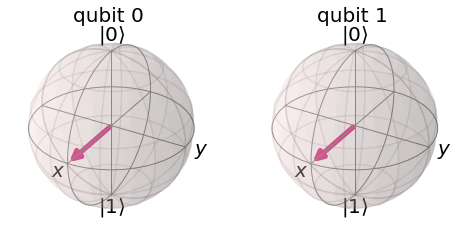

In [17]:
#Repeats above block with a different output method, then prints bloch statevector and multivector spheres

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)


In [16]:
#Creates 2-qubit circuit, places a H gate on q0 and an X-gate followed by an H-gate on q1, then draws the circuit
#This creates the state |−+>= 1/2(|00>+|01>−|10>−|11>)
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()


┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Math object>

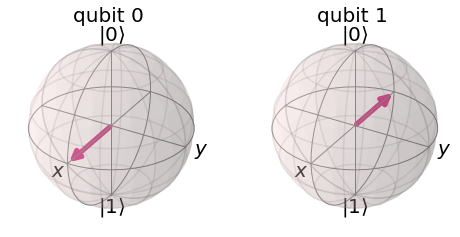

In [18]:
#Remakes circuit as above with target in negative phase, then runs simulation to produce statevector and bloch multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)


┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Math object>

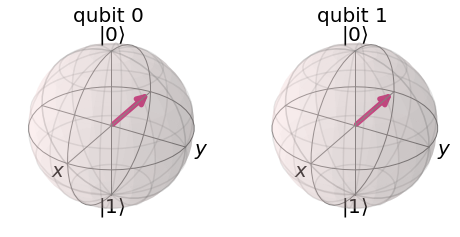

In [19]:
#Applies CNOT gate to previous circuit, resulting in a change of the control qubit, but not of the target of the gate

qc.cx(0,1)
display(qc.draw())

qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)


In [20]:
#Creates circuit detailing equivalence of CNOT gate and an equivalent gate using a reversed CNOT gate,
#Then runs unitary simulation to output matrix detailing operations of the circuit

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")


┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Math object>

In [21]:
#Partnered to block above to show a reversed CNOT is equivalent to a CNOT wrapped in H-gates,
#Then run unitary simulation to output operations matrix

qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")


┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

<IPython.core.display.Math object>

In [11]:
#creates circuit with a Controlled T-gate on q0-q1 with phase pi/4, then draws the circuit

qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()


q_0: ────■─────
     ┌───┴────┐
q_1: ┤ P(π/4) ├
     └────────┘

In [22]:
#Creates same circuit as above then runs unitary simulator to output the Controlled T-gate Matrix
#This gate rotates the control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged

qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Controlled-T} = \n")


q_0: ────■─────
     ┌───┴────┐
q_1: ┤ P(π/4) ├
     └────────┘

<IPython.core.display.Math object>

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

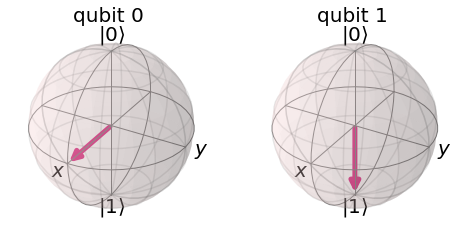

In [23]:
#Creates 2-qubit circuit, places H-gate on q0 and X-gate on q1, then draws circuit and runs simulation to output
#bloch multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)


┌───┐          
q_0: ┤ H ├────■─────
     ├───┤┌───┴────┐
q_1: ┤ X ├┤ P(π/4) ├
     └───┘└────────┘

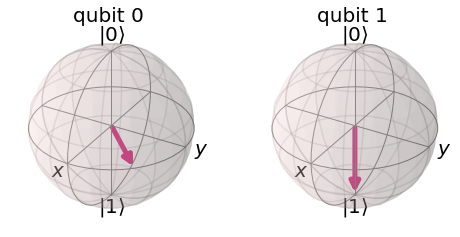

In [25]:
#Draw 2-bit circuit, add H-gate to q0 and X-gate to q1. Then, add CT gate of pi/4 from q0-q1 and plot bloch multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)


In [26]:
#Outputs Qiskit versions

import qiskit
qiskit.__qiskit_version__


{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}

### Chapter 2.4 -- More Circuit Identities

In [27]:
#Import relevant packages for the section, then create a 2-bit circuit and declares two variables

from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1


In [28]:
#Puts C-z gate on q(c)-q(t) then draws circuit

# a controlled-Z
qc.cz(c,t)
qc.draw()


q_0: ─■─
      │ 
q_1: ─■─

In [ ]:
#Declares new 2-qubit circuit, creates controlled Z gate using Identity HCXH = CZ

qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()


In [30]:
#Makes controlled Y by wrapping CNOT gate with Sdg and S gates then draws circuit

qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()


q_0: ─────────■───────
     ┌─────┐┌─┴─┐┌───┐
q_1: ┤ SDG ├┤ X ├┤ S ├
     └─────┘└───┘└───┘

In [31]:
#Makes controlled H gate by wrapping CX with Ry gates of opposing rotations

qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()


q_0: ─────────────■──────────────
     ┌─────────┐┌─┴─┐┌──────────┐
q_1: ┤ RY(π/4) ├┤ X ├┤ RY(-π/4) ├
     └─────────┘└───┘└──────────┘

In [32]:
#Declares variables for swapping qubits

a = 0
b = 1


In [34]:
#Creates 2-qubit circuit, then swaps positions a and b then draws circuit

qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()


q_0: ─X─
      │ 
q_1: ─X─

In [40]:
#Creates 2-qubit circuit, then swaps qubits using elementary gate operations.
#Uses CX gate from q(a)-q(b) to copy a 1 from a to b, then puts CX gate on q(b)-q(a) to rotate state of a to 0

qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()


┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘

In [ ]:
#Applies reverse operation of above to return to original state

# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()


In [41]:
#Makes a circuit that can swap states in both directions

qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()


┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

In [ ]:
#Makes reversed gate setup, though this still works the same as the above and swaps with the same efficacy.

qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()


In [42]:
#Makes new circuit then defines an angle to rotate by. Creates controlled version of RY gate

qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()


q_0: ─────────────■────────────────■──
     ┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐
q_1: ┤ RY(π/2) ├┤ X ├┤ RY(-π/2) ├┤ X ├
     └─────────┘└───┘└──────────┘└───┘

In [43]:
#We can also make a controlled version of any single-qubit rotation, V.
# we find three rotations A, B and C, and a phase α such that ABC = I and e^(i*alpha)AZBZC=V

such that
ABC=I,   eiαAZBZC=V

A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit


In [44]:
#Makes controlled V gate using above circuit gates

qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw()


┌──────┐
q_0: ──────■───────■─┤ P(1) ├
     ┌───┐ │ ┌───┐ │ └┬───┬─┘
q_1: ┤ C ├─■─┤ B ├─■──┤ A ├──
     └───┘   └───┘    └───┘

In [45]:
#Makes circuit and places a Toffoli Gate on controls q1-2 and target q3

qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [46]:
#Defines an arbitrary controlled-controlled-U for any single-qubit rotation U

qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw()


q_0: ──────────■─────────────■─────■────
             ┌─┴─┐         ┌─┴─┐   │    
q_1: ───■────┤ X ├────■────┤ X ├───┼────
     ┌──┴───┐└───┘┌───┴───┐└───┘┌──┴───┐
q_2: ┤ P(π) ├─────┤ P(-π) ├─────┤ P(π) ├
     └──────┘     └───────┘     └──────┘

In [47]:
#Creates 3-qubit circuit and implements another version of the AND gate

qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()


q_0: ──■───────■──
       │       │  
q_1: ──┼───■───┼──
     ┌─┴─┐ │ ┌─┴─┐
q_2: ┤ H ├─■─┤ H ├
     └───┘   └───┘

In [48]:
#Places T gate on q0 of a new 1-qubit circuit and draws it.
#Represents a rotation about the Z-axis by pi/4

qc = QuantumCircuit(1)
qc.t(0) # T gate on qubit 0
qc.draw()


┌───┐
q_0: ┤ T ├
     └───┘

In [49]:
#Creates similar gate to T gate but on X-axis

qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()


┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ T ├┤ H ├
     └───┘└───┘└───┘

In [50]:
#Creates the gate Rz(pi/4)Rx(pi/4)

qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()


┌───┐┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ T ├┤ H ├┤ T ├
     └───┘└───┘└───┘└───┘

In [51]:
#Creates the same rotation as above around a second, arbitrary axis

qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()


┌───┐┌───┐┌───┐┌───┐
q_0: ┤ T ├┤ H ├┤ T ├┤ H ├
     └───┘└───┘└───┘└───┘

In [52]:
#Prints current qiskit version

import qiskit
qiskit.__qiskit_version__


{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}

### Chapter 2.5 -- Proving Universality

In [53]:
#This block would create a portion of the Unitary gate from a single rx gate and CNOT gates

qc.cx(0,2)
qc.cx(0,1)
qc.rx(theta,0)
qc.cx(0,1)
qc.cx(0,2)

CircuitError: 'Index out of range.'

In [54]:
#This block would create a portion of the unitary gate using Hadamard gates

qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,2)
qc.cx(0,1)
qc.rx(theta,0)
qc.cx(0,1)
qc.cx(0,2)
qc.h(2)
qc.h(1)
qc.h(0)

CircuitError: 'Index out of range.'

In [56]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}

### Chapter 2.6 -- Classical Computation on a Quantum Computer

In [64]:
#Imports relevant packages

from qiskit import QuantumCircuit, QuantumRegister


In [58]:
#Creates 3 quantum registers with defined names, then makes a circuit with them. Places a cx gate on qr0[0]-qr1[0]
#and draws the circuit

input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw()


input_0: ──■──
           ┌─┴─┐
 output_0: ┤ X ├
           └───┘
garbage_0: ─────

In [65]:
#Makes Vf gate using cx gates then draws circuit

Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()


input_0: ──■────■──
             │  ┌─┴─┐
 output_0: ──┼──┤ X ├
           ┌─┴─┐└───┘
garbage_0: ┤ X ├─────
           └───┘

In [60]:
#makes circuit using Uf and inverse of above Vf gate and draws the circuit.

qc = Uf + Vf.inverse()
qc.draw()


input_0: ──■────■────■──
           ┌─┴─┐┌─┴─┐  │  
 output_0: ┤ X ├┤ X ├──┼──
           └───┘└───┘┌─┴─┐
garbage_0: ──────────┤ X ├
                     └───┘

In [61]:
#Makes new circuit that will copy from one qubit to another.

final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

copy.draw()


output_0: ──■──
                ┌─┴─┐
final-output_0: ┤ X ├
                └───┘

In [67]:
#makes new circuit that will copy the final output in a non-entangled state to get a garbage-free output

(Vf.inverse() + copy + Vf).draw()


input_0: ──■────■─────────■────■──
                ┌─┴─┐  │         │  ┌─┴─┐
      output_0: ┤ X ├──┼────■────┼──┤ X ├
                └───┘┌─┴─┐  │  ┌─┴─┐└───┘
     garbage_0: ─────┤ X ├──┼──┤ X ├─────
                     └───┘┌─┴─┐└───┘     
final-output_0: ──────────┤ X ├──────────
                          └───┘

In [66]:
#Prints qiskit version

import qiskit
qiskit.__qiskit_version__


{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}